In [1]:
from data_mining import ImagePreProcessing
from spiking_layer import SpikeRepresentationLayer
from data_visualization import SpikeViz

import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Image Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
ipp = ImagePreProcessing(dataset_patterns=x_train, 
                         dataset_labels=y_train,
                         patch_size=5,
                         patch_stride=1)
ipp.setMaxPatterns(val=1)
ipp.setMaxLabels(val=10)

In [4]:
patches_per_label = ipp.run()
ipp.summary()

Dimensão (n x n) da imagem de entrada: n = 28
Dimensão (p x p) de cada patch(subset) da imagem: p = 5
Deslocamento da janela de extração de patches: 1
Quantidade de rótulos utilizados: 10
Quantidade de padrões utilizados: 1
Quantidade de patches extraídos por imagem: 529
Dimensão do conjunto de imagens, por rótulo: (10, 1, 28, 28)
Dimensões do conjunto de patches (Entrada para SNN): (10, 1, 529, 5, 5)


In [5]:
W = np.random.uniform(0, 1, (ipp.patches_ds.shape[2], ipp.patch_size, ipp.patch_size))
print("Dimensão da matriz de pesos sinápticos:", W.shape)

Dimensão da matriz de pesos sinápticos: (529, 5, 5)


In [6]:
srl = SpikeRepresentationLayer(patches = patches_per_label, 
                               weights = W,
                               neurons_type = "FS")
spike_train, spike_count = srl.generateSpikeTrain()
print('Dimensão do spike train para o dataset de entrada:', spike_train.shape)

Dimensão do spike train para o dataset de entrada: (10, 1, 529, 401)


# Quantidade de spikes disparados pela camada, para cada neurônio (gráfico da direita) e uma amostra de rótulos e um padrão.

In [7]:
spkViz = SpikeViz(original_image=ipp.patlab_ds)

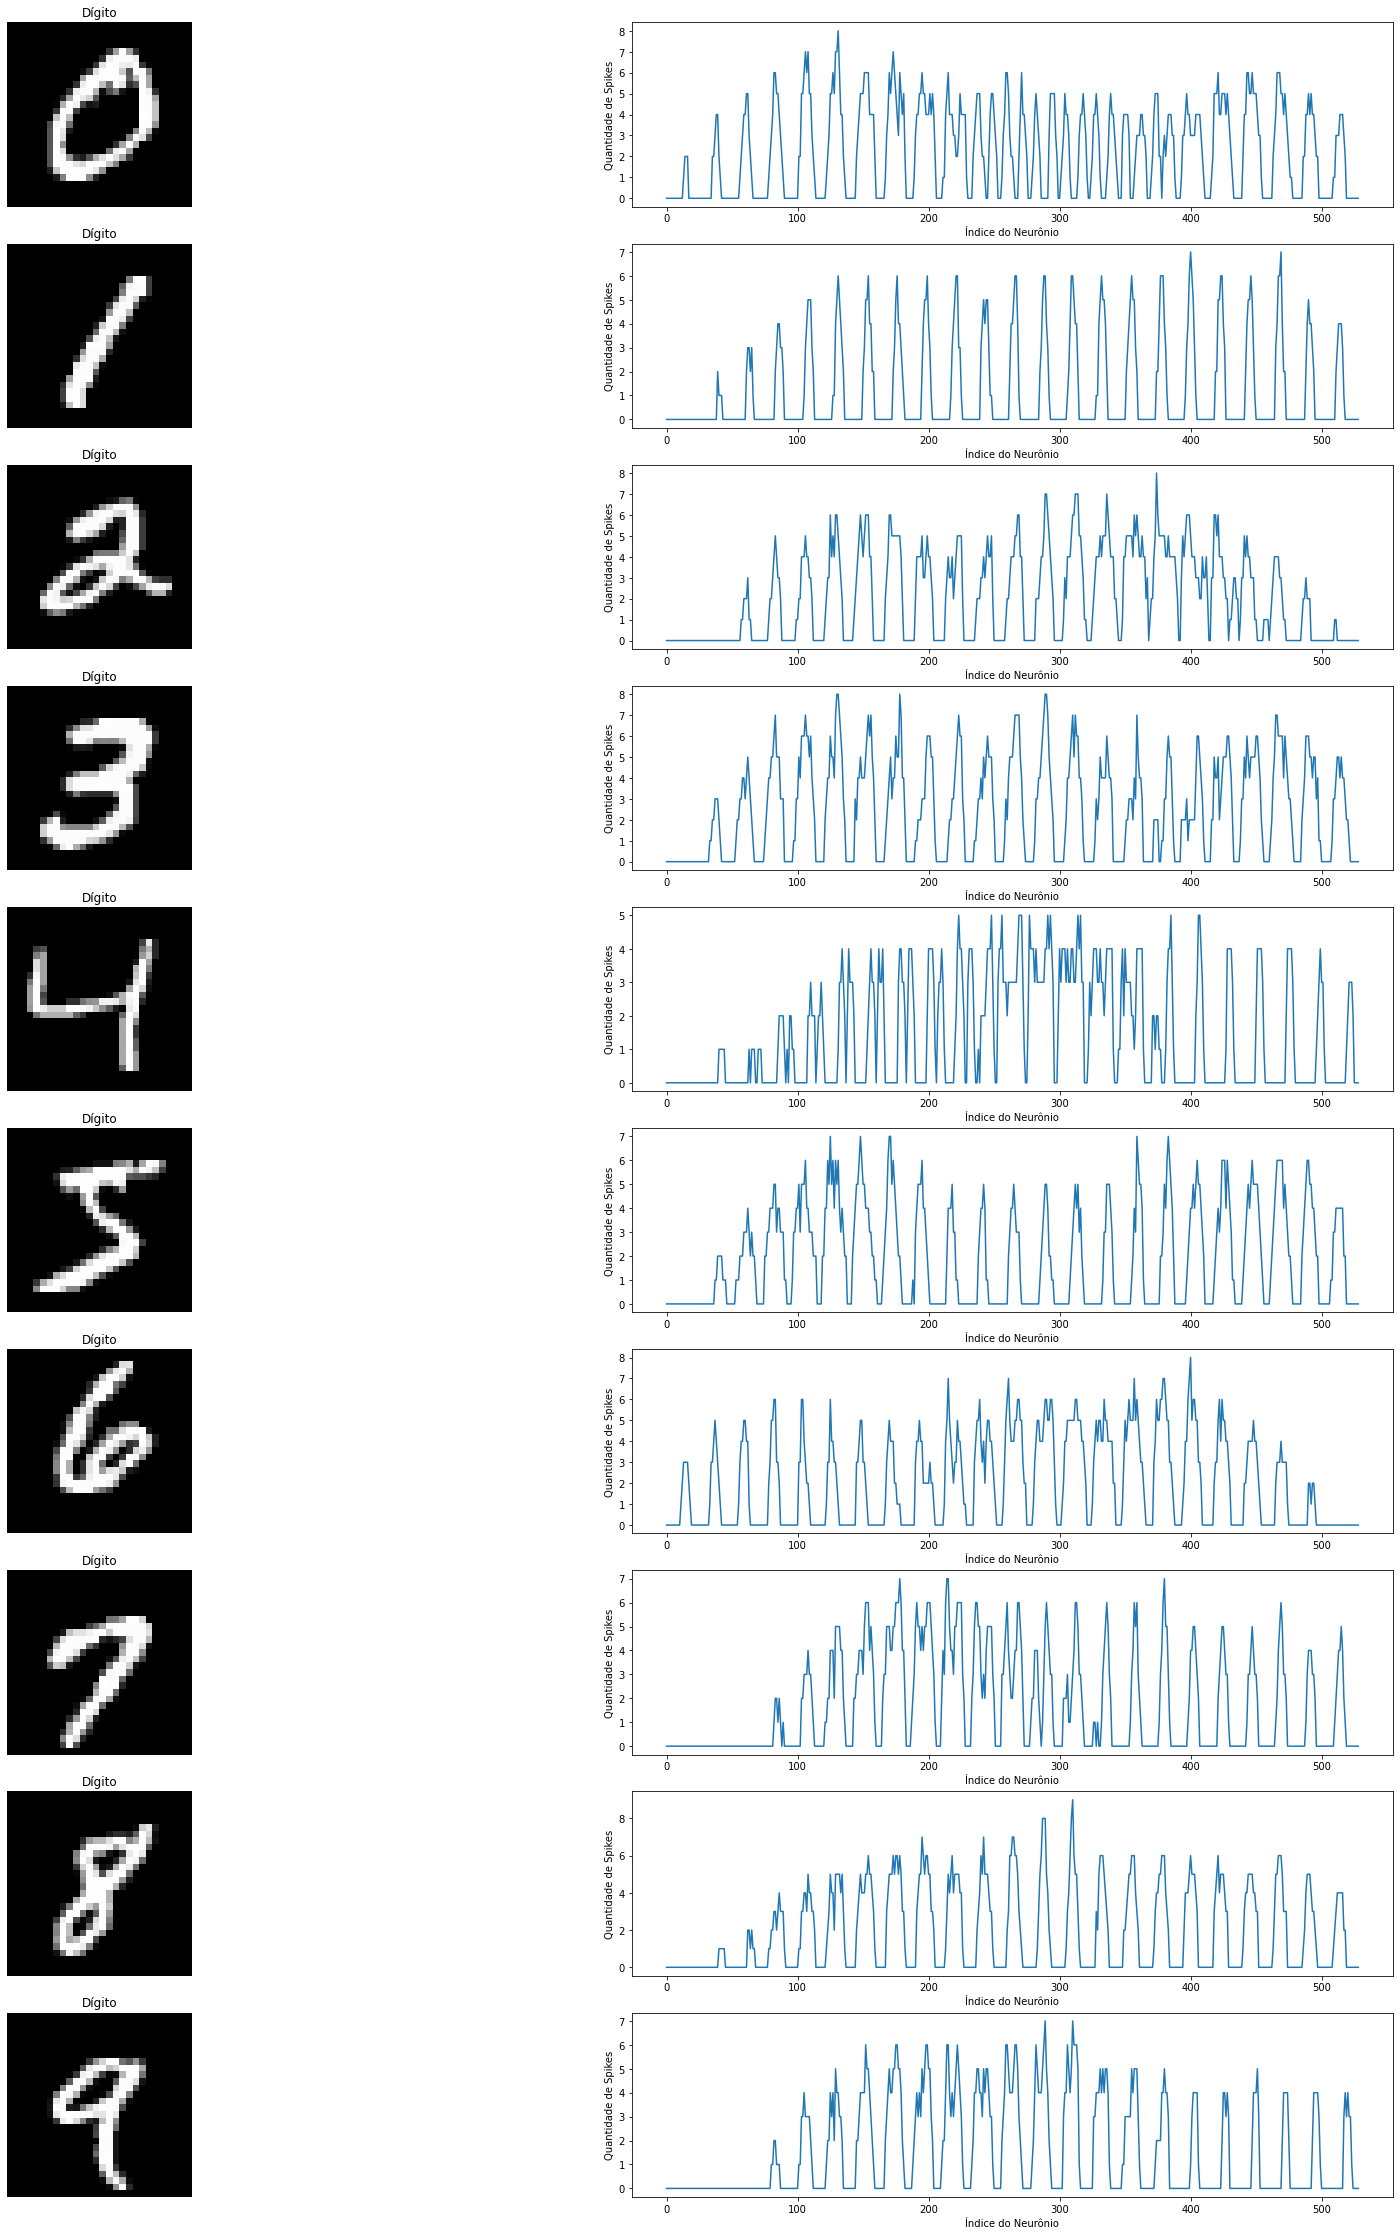

In [8]:
spkViz.printSpikeViz(spike_obj=spike_count, 
                     x_label="Índice do Neurônio",
                     y_label="Quantidade de Spikes",
                     by_neuron= False)

# Amostragem dos spike trains gerados por uma amostra de rótulos e um padrão para um neurônio da camada: 

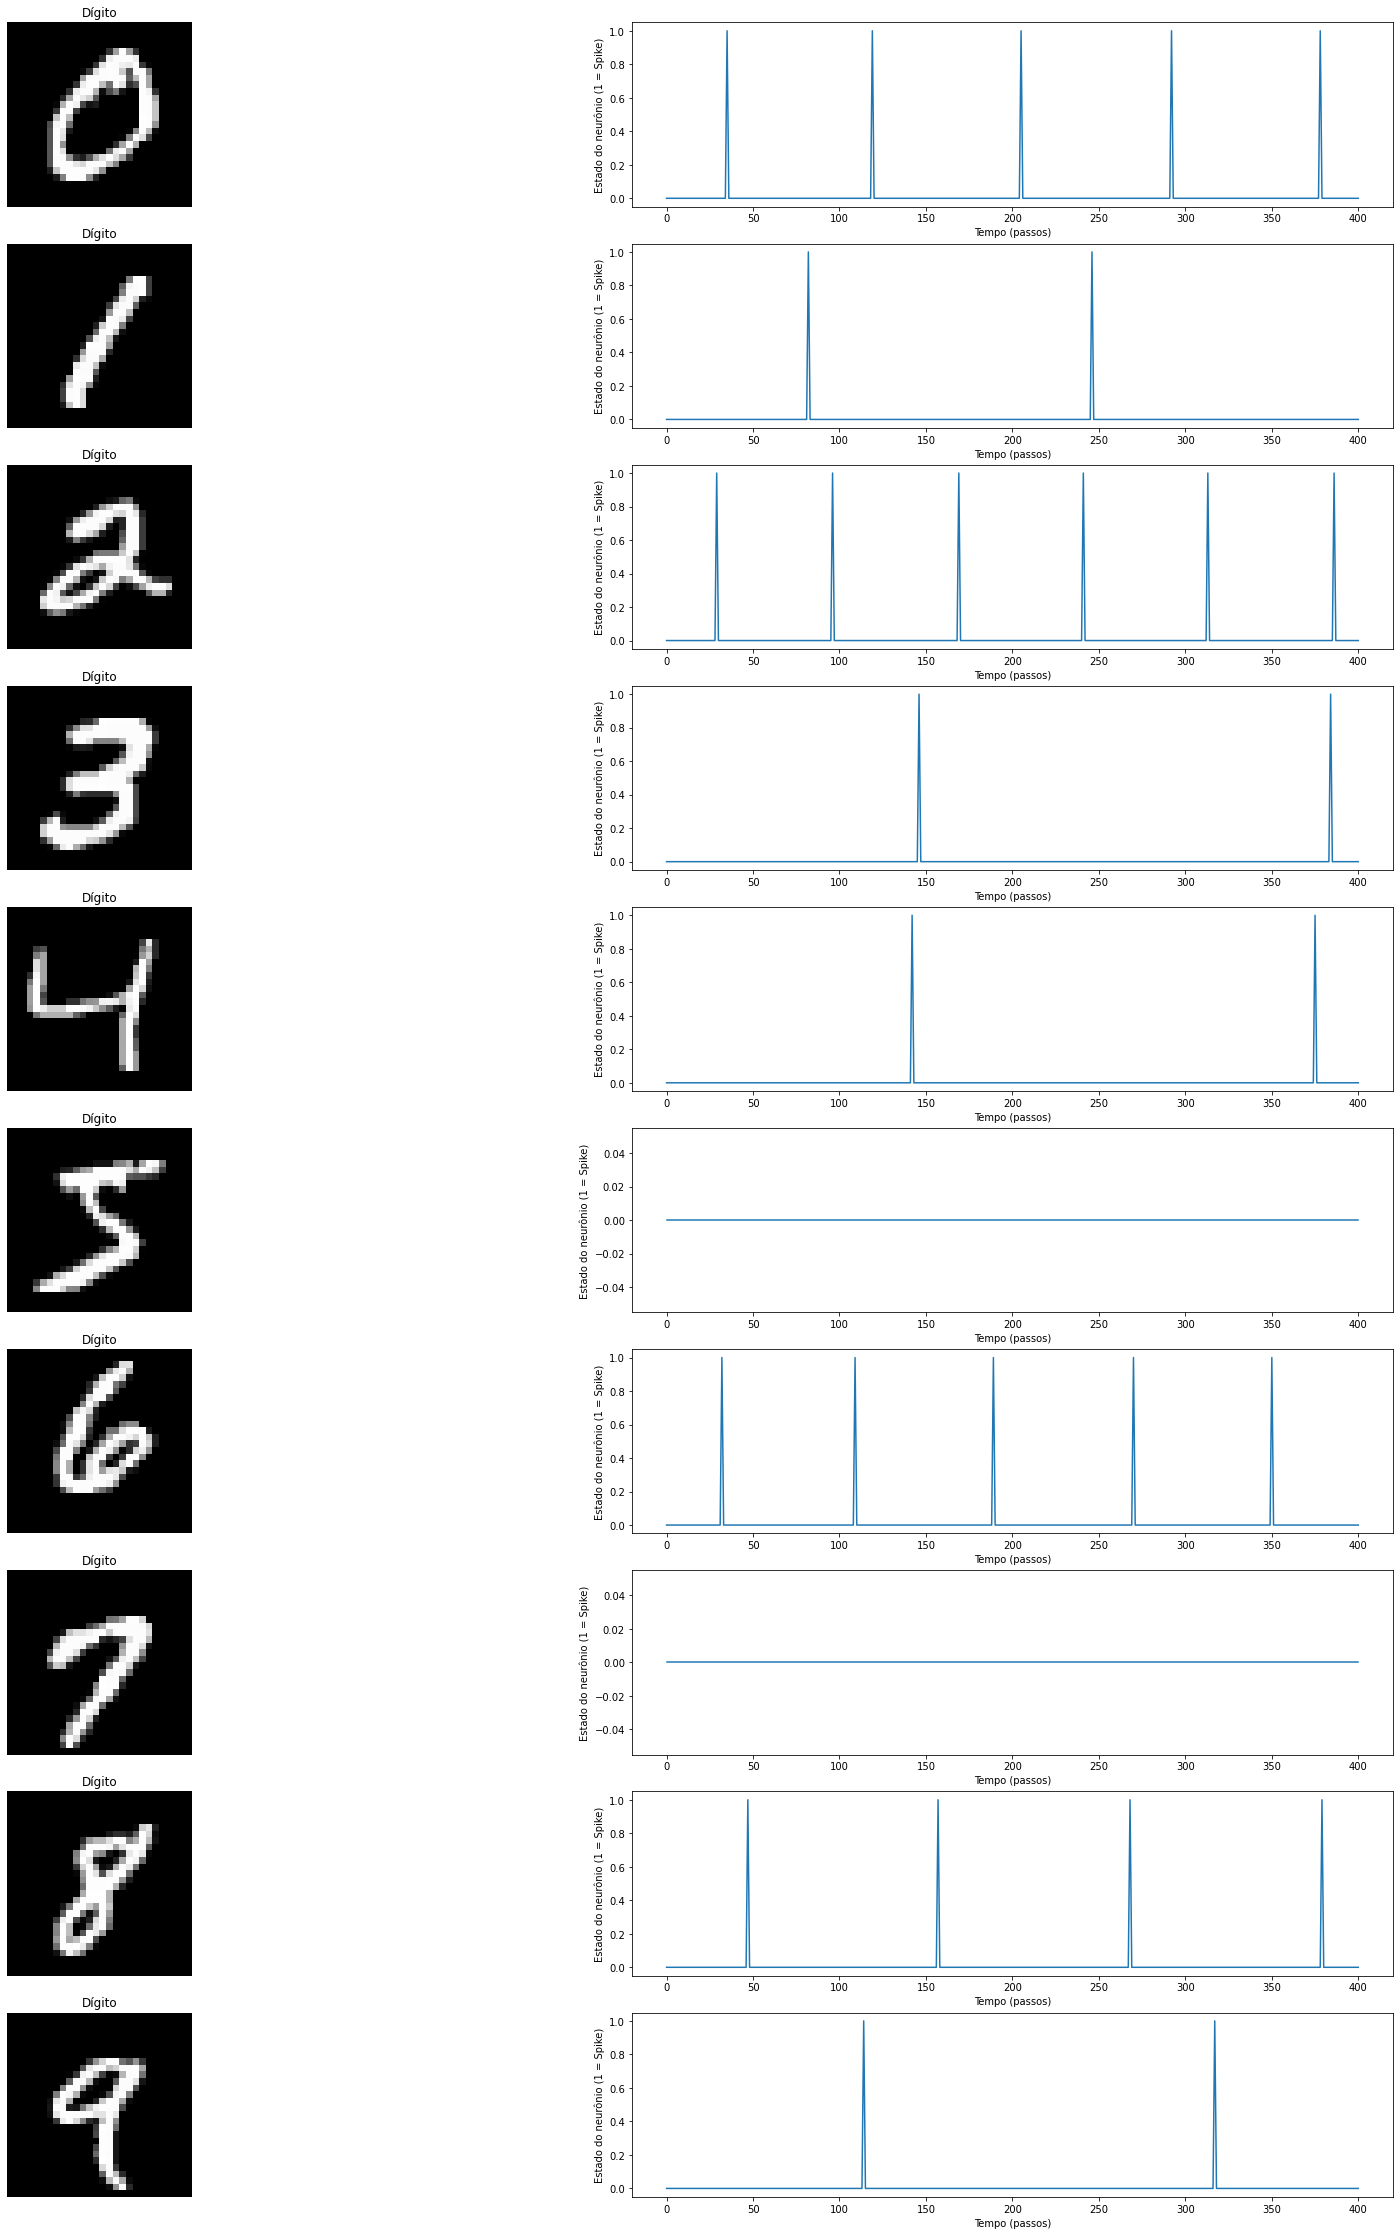

In [9]:
spkViz.printSpikeViz(spike_obj=spike_train, 
                     x_label="Tempo (passos)",
                     y_label="Estado do neurônio (1 = Spike)",
                     by_neuron= True,
                     neuron_idx = 375)

# Apresentação do potencial da membrana de um neurônio danda uma amostra de padrão, para cada rótulo:

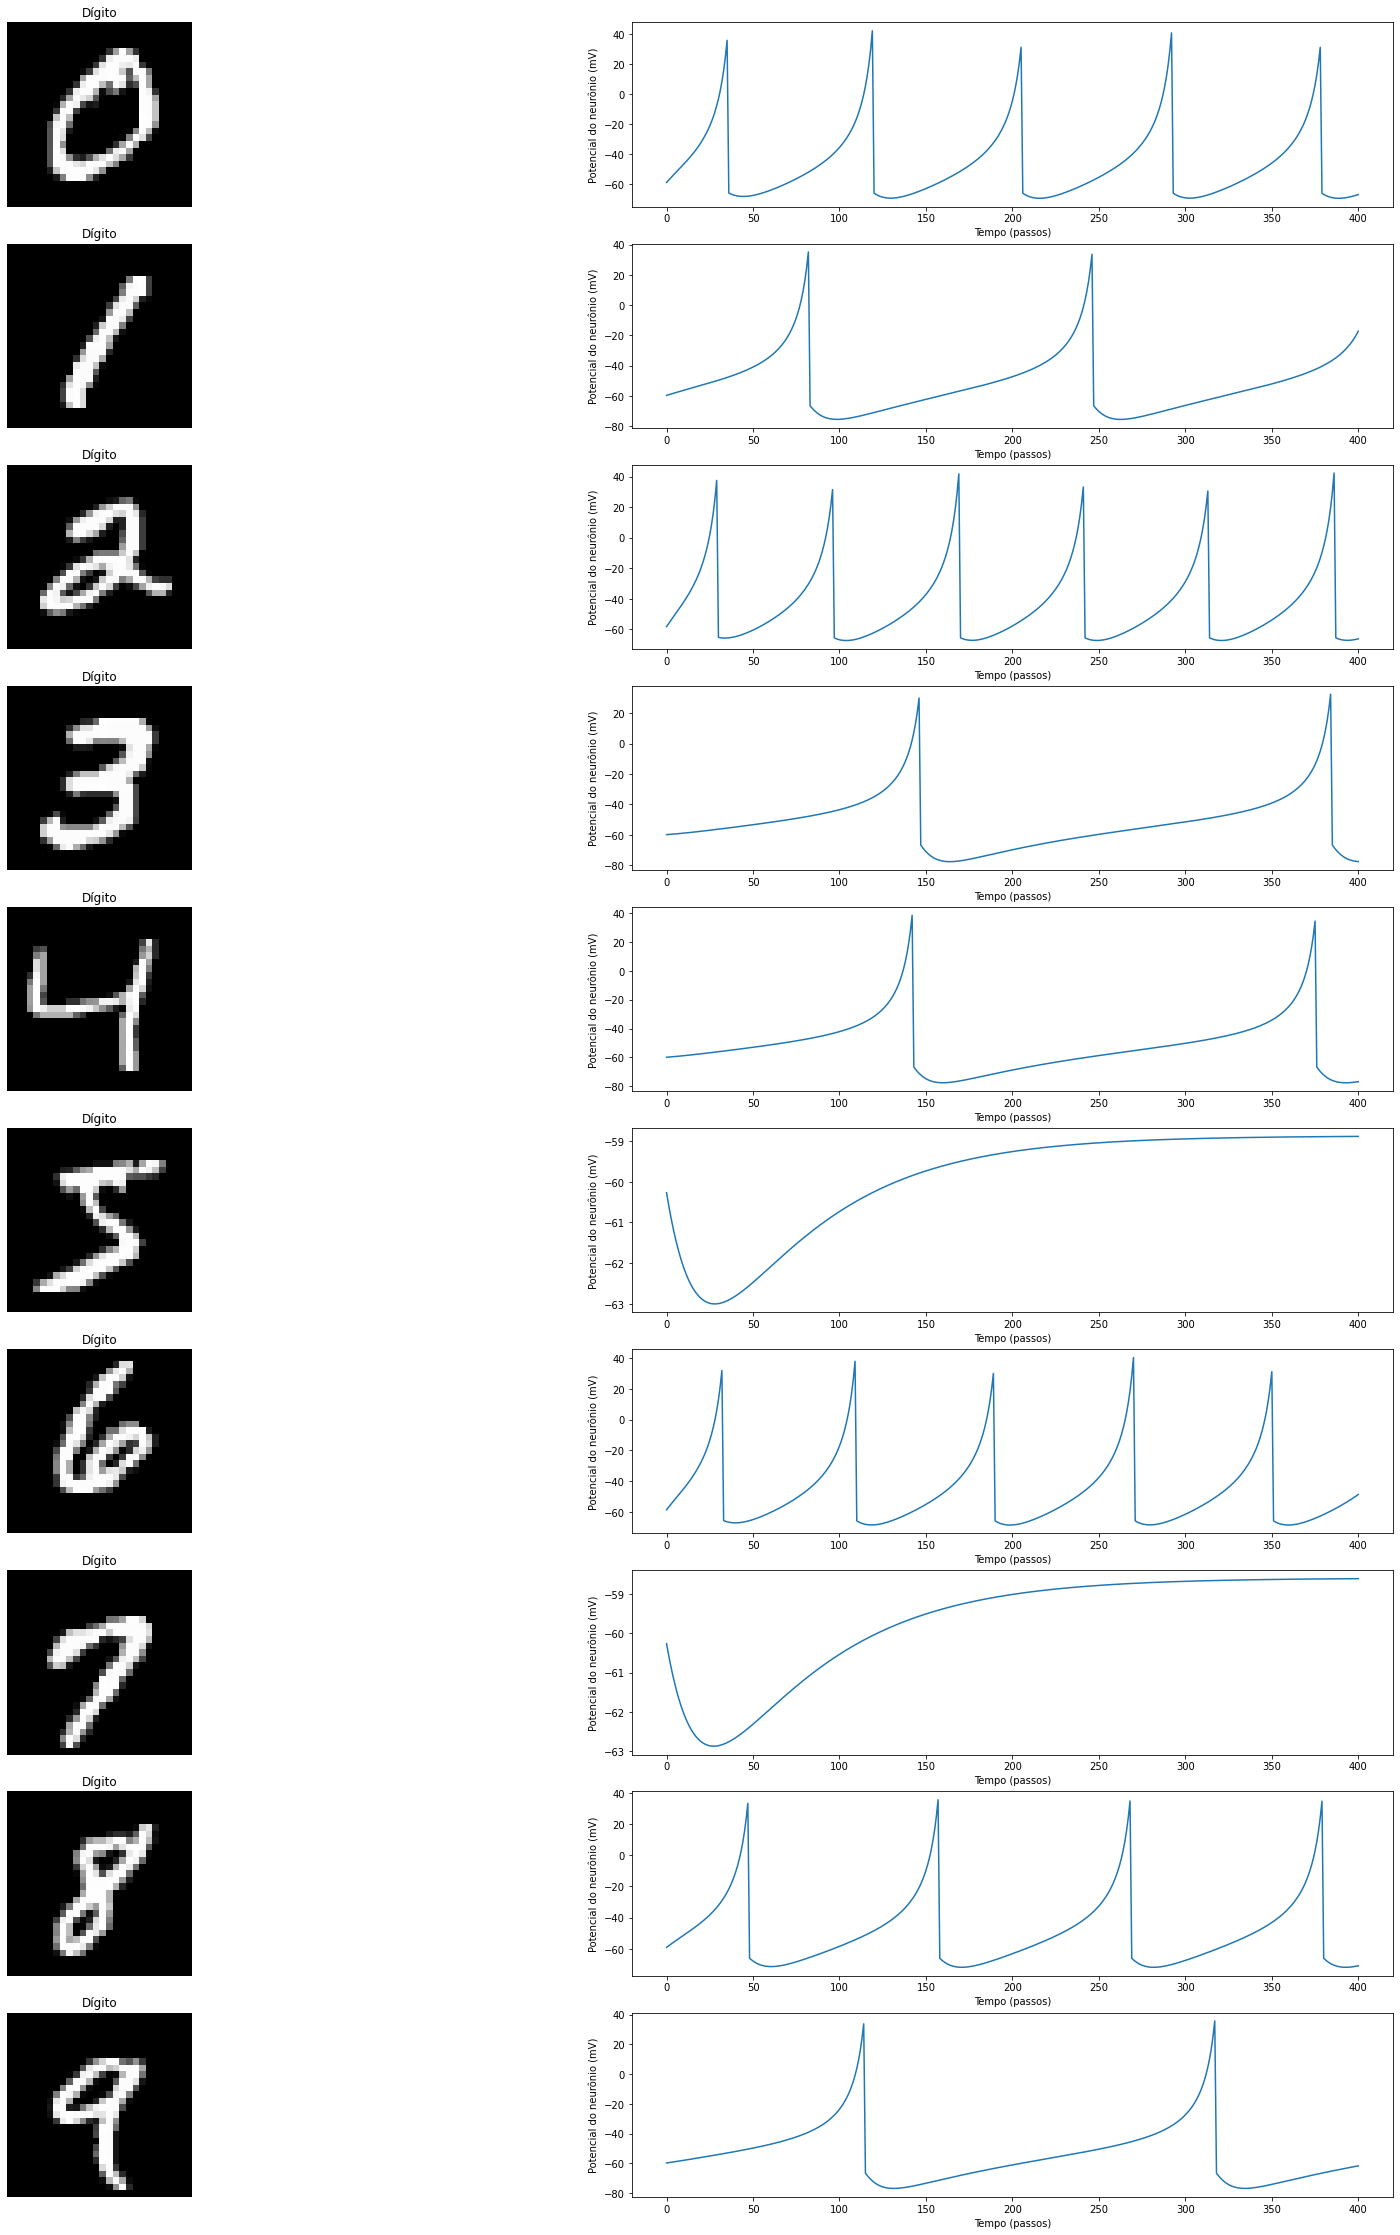

In [10]:
spkViz.printSpikeViz(spike_obj=srl.net_neuron_potential, 
                     x_label="Tempo (passos)",
                     y_label="Potencial do neurônio (mV)",
                     by_neuron= True, 
                     neuron_idx = 375)